# Natural Language Processing - Text Classification example

###### Links: [News dataset (Kaggle)](https://www.kaggle.com/rmisra/news-category-dataset)  |  [Article (TowardsDataScience)](https://towardsdatascience.com/text-analysis-feature-engineering-with-nlp-502d6ea9225d)

### 0 - Setup

###### Import pckgs

In [2]:
!pip install nlp_utils

  Using cached micro_toolkit-0.9.0-py2.py3-none-any.whl (9.3 kB)


In [4]:
import warnings
warnings.filterwarnings("ignore")
#from nlp_utils import *

###### Import data

In [17]:
import json

lst_dics = []
with open('News_Category_Dataset_v2.json', mode='r', errors='ignore') as json_file:
    for dic in json_file:
        lst_dics.append( json.loads(dic) )
    
lst_dics[0]

{'category': 'CRIME',
 'headline': 'There Were 2 Mass Shootings In Texas Last Week, But Only 1 On TV',
 'authors': 'Melissa Jeltsen',
 'link': 'https://www.huffingtonpost.com/entry/texas-amanda-painter-mass-shooting_us_5b081ab4e4b0802d69caad89',
 'short_description': 'She left her husband. He killed their children. Just another day in America.',
 'date': '2018-05-26'}

In [18]:
dtf = pd.DataFrame(lst_dics)
dtf = dtf[ dtf["category"].isin(['ENTERTAINMENT','POLITICS','TECH']) ][["category","headline"]]
dtf = dtf.rename(columns={"category":"y", "headline":"text"})

In [7]:
dtf.sample(5)

y                                               text
46823   ENTERTAINMENT  Chrissy Teigen's Baby Luna Makes The Cutest Li...
42974        POLITICS        Marco Rubio Survives In Florida Senate Race
67044        POLITICS                    This Is A Bad Tweet, 'Hardball'
106731       POLITICS              My First Interview with Yasser Arafat
72779        POLITICS  San Bernardino Shooting Revives NSA Surveillan...

In [19]:
dtf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50879 entries, 1 to 200848
Data columns (total 2 columns):
y       50879 non-null object
text    50879 non-null object
dtypes: object(2)
memory usage: 1.2+ MB


### 1 - Text Analysis

###### Look for Metadata
- Language detection
- Named-entities recognition
- Text cleaning
- Length analysis
- Sentiment analysis
- Word frequency

###### Target Variable

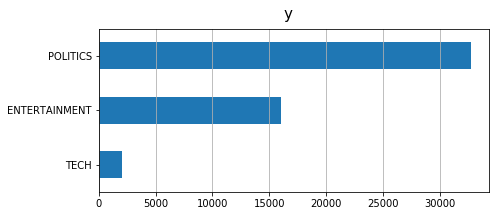

In [20]:
utils_plot_distributions(dtf, x="y", top=None, figsize=(7,3))

In [7]:
# Imbalanced

###### Language Detection

In [10]:
# this takes a while
dtf = add_detect_lang(dtf, "text")
dtf.head()

y                                               text lang
1  ENTERTAINMENT  Will Smith Joins Diplo And Nicky Jam For The 2...   en
2  ENTERTAINMENT    Hugh Grant Marries For The First Time At Age 57   en
3  ENTERTAINMENT  Jim Carrey Blasts 'Castrato' Adam Schiff And D...   en
4  ENTERTAINMENT  Julianna Margulies Uses Donald Trump Poop Bags...   en
5  ENTERTAINMENT  Morgan Freeman 'Devastated' That Sexual Harass...   en

In [11]:
# check
i = 0
print(dtf["text"].iloc[i], " --> ", dtf["lang"].iloc[i])

Will Smith Joins Diplo And Nicky Jam For The 2018 World Cup's Official Song  -->  en


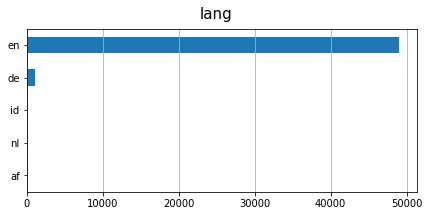

In [12]:
utils_plot_distributions(dtf, x="lang", top=5, figsize=(7,3))

In [13]:
# filter english only
dtf = dtf[dtf["lang"]=="en"]

###### Named-Entity Recognition

In [ ]:
!python -m spacy download en_core_web_lg

In [23]:
ner = spacy.load("en_core_web_sm")


In [24]:
lst_tag_type = ["ORG","PERSON","NORP","GPE","LOC","FAC","EVENT","PRODUCT","WORK_OF_ART"]

In [29]:
ner_displacy(dtf["text"].iloc[0], ner, lst_tag_type, title="NER example")

In [30]:
# example of replacing text and tags extraction
utils_ner_text(dtf["text"].iloc[0], ner, lst_tag_type, grams_join="_")

("Will_Smith Joins Diplo And Nicky_Jam For The_2018 World_Cup's Official Song",
 [('Will Smith', 'PERSON'),
  ('Nicky Jam', 'PERSON'),
  ('The 2018', 'EVENT'),
  ("World Cup's", 'EVENT')])

In [31]:
# this takes a while
dtf = add_ner_spacy(dtf, "text", ner, lst_tag_type, grams_join="_", create_features=True)
dtf.head()

--- tagging ---
--- counting tags ---
--- creating features ---


y                                               text  \
1  ENTERTAINMENT  Will Smith Joins Diplo And Nicky Jam For The 2...   
2  ENTERTAINMENT    Hugh Grant Marries For The First Time At Age 57   
3  ENTERTAINMENT  Jim Carrey Blasts 'Castrato' Adam Schiff And D...   
4  ENTERTAINMENT  Julianna Margulies Uses Donald Trump Poop Bags...   
5  ENTERTAINMENT  Morgan Freeman 'Devastated' That Sexual Harass...   

                                         text_tagged  \
1  Will_Smith Joins Diplo And Nicky_Jam For The_2...   
2    Hugh_Grant Marries For The First Time At Age 57   
3  Jim_Carrey Blasts 'Castrato'_Adam_Schiff And D...   
4  Julianna Margulies Uses Donald Trump Poop Bags...   
5  Morgan_Freeman_'Devastated' That Sexual Harass...   

                                                tags  tags_PERSON  \
1  [{('Will Smith', 'PERSON'): 1}, {('Nicky Jam',...            2   
2                    [{('Hugh Grant', 'PERSON'): 1}]            1   
3  [{('Jim Carrey', 'PERSON'): 1}, {('Castrato' A...            1   
4                                                 []            0   
5                 [{('Morgan Freeman '', 'ORG'): 1}]            0   

   tags_WORK_OF_ART  tags_PRODUCT  tags_NORP  tags_GPE  tags_FAC  tags_LOC  \
1                 0             0          0         0         0         0   
2                 0             0          0         0         0         0   
3                 1             0          1         1         0         0   
4                 0             0          0         0         0         0   
5                 0             0          0         0         0         0   

   tags_EVENT  tags_ORG  
1           2         0  
2           0         0  
3           0         0  
4           0         0  
5           0         1

In [32]:
# check
i = 0
print(dtf["text"].iloc[i], " --> ")
print(dtf["text_tagged"].iloc[i])
print("tags:")
dtf["tags"].iloc[i]

Will Smith Joins Diplo And Nicky Jam For The 2018 World Cup's Official Song  --> 
Will_Smith Joins Diplo And Nicky_Jam For The_2018 World_Cup's Official Song
tags:


[{('Will Smith', 'PERSON'): 1},
 {('Nicky Jam', 'PERSON'): 1},
 {('The 2018', 'EVENT'): 1},
 {("World Cup's", 'EVENT'): 1}]

# ENTERTAINMENT:


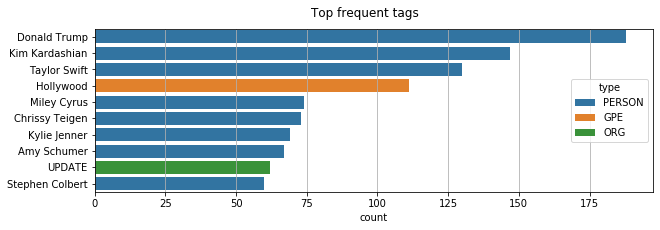

# POLITICS:


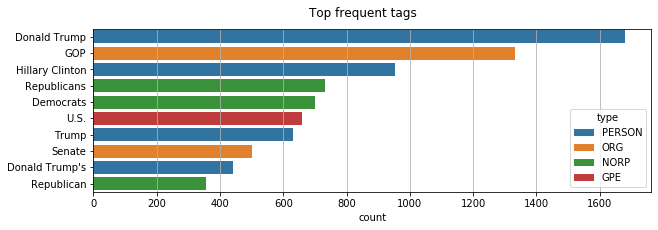

# TECH:


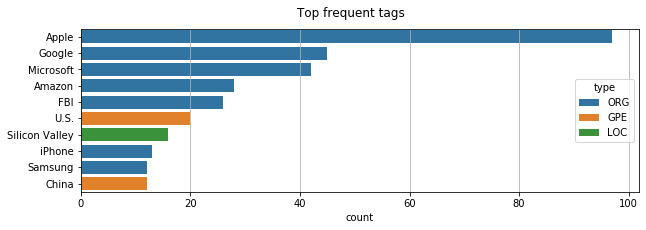

In [33]:
for y in dtf["y"].unique():
    print("# {}:".format(y))
    common_tags = tags_freq(tags=dtf[dtf["y"]==y]["tags"], top=10, figsize=(10,3))

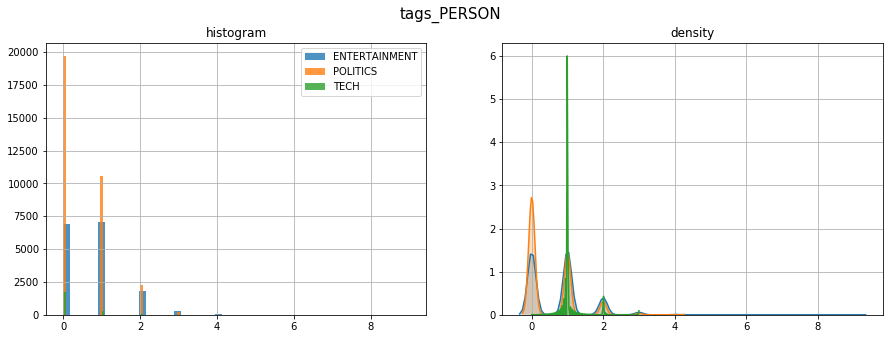

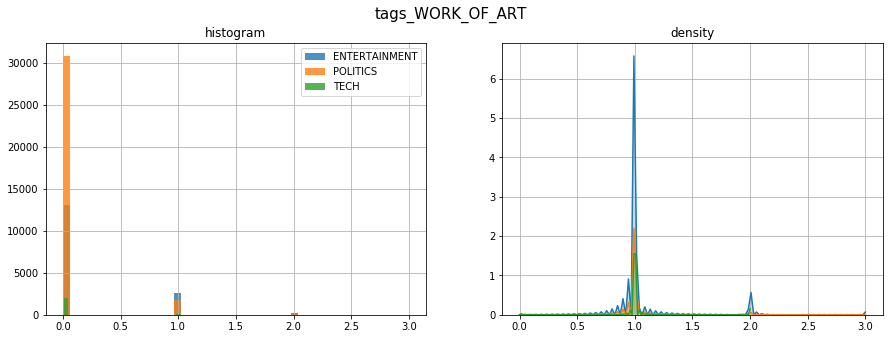

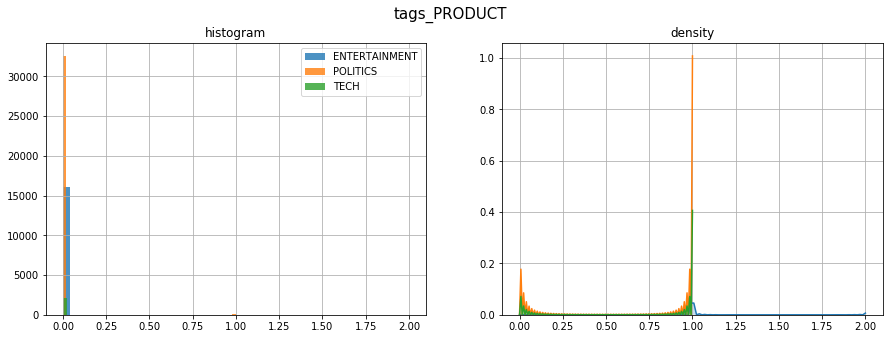

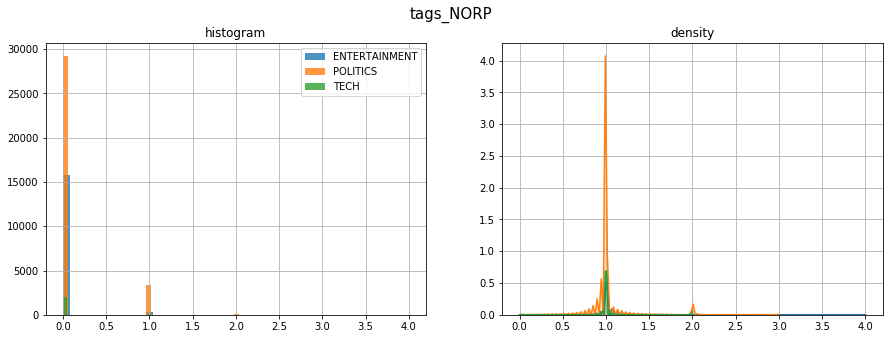

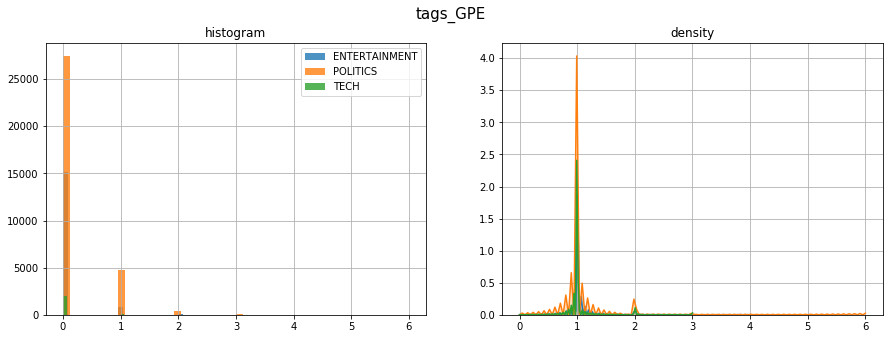

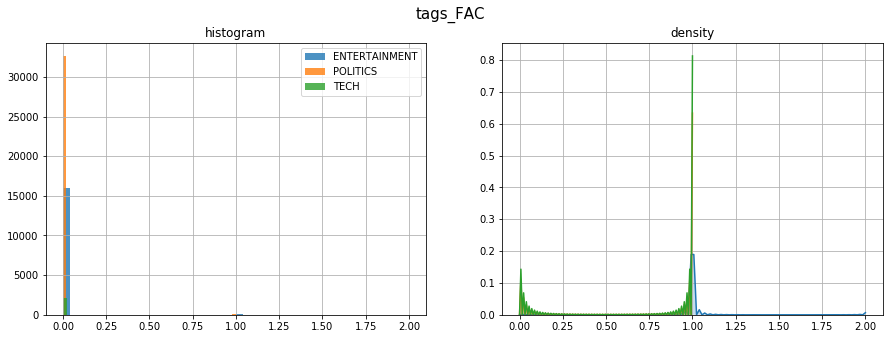

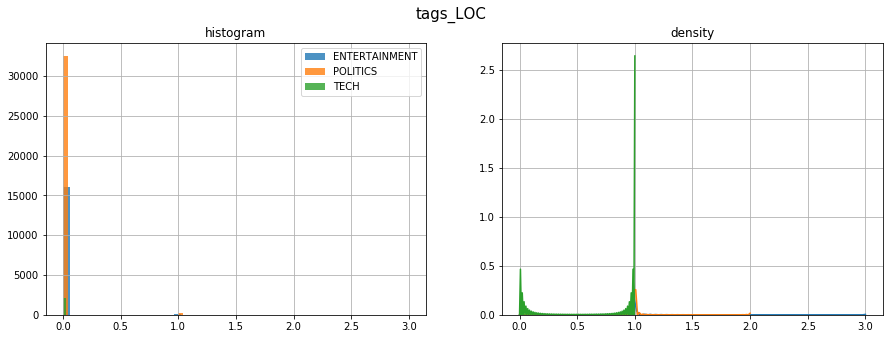

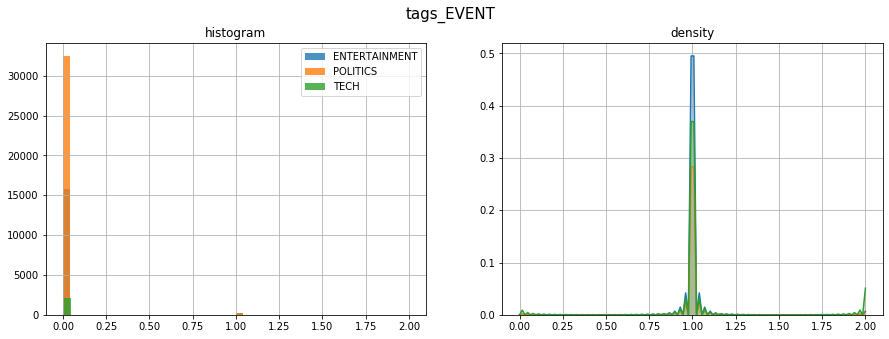

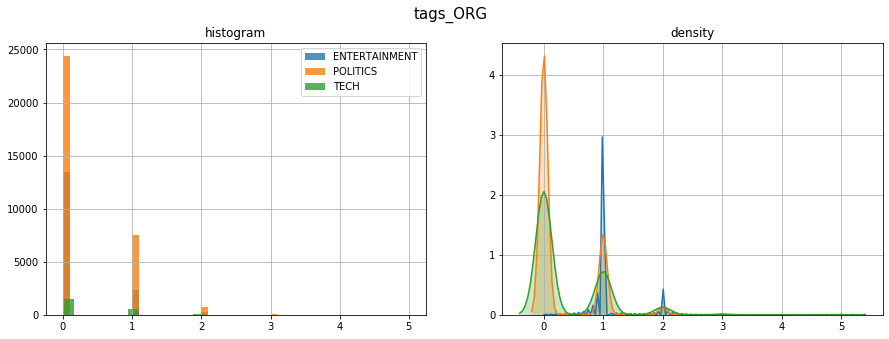

In [34]:
# tags bivariate distribution
for x in dtf.filter(like="tags_", axis=1).columns:
    utils_plot_distributions(dtf, x=x, y="y", bins=None, figsize=(15,5))

###### Text Cleaning

In [35]:
# example
i = 0
print("--- original ---")
print(dtf["text"].iloc[i])

print("--- cleaning ---")
print(utils_preprocess_text(dtf["text"].iloc[i], lst_regex=None, 
                      lst_stopwords=None, flg_stemm=False, flg_lemm=True))

print("--- tokenization ---")
print(dtf["text"].iloc[i].split())

print("--- remove stopwords ---")
print(utils_preprocess_text(dtf["text"].iloc[i], lst_regex=None, 
                      lst_stopwords=nltk.corpus.stopwords.words("english"), 
                      flg_stemm=False, flg_lemm=None))

print("--- stemming ---")
print(utils_preprocess_text(dtf["text"].iloc[i], lst_regex=None, 
                      lst_stopwords=nltk.corpus.stopwords.words("english"), 
                      flg_stemm=True, flg_lemm=False))

print("--- lemmatisation ---")
print(utils_preprocess_text(dtf["text"].iloc[i], lst_regex=None, 
                      lst_stopwords=nltk.corpus.stopwords.words("english"), 
                      flg_stemm=False, flg_lemm=True))

--- original ---
Will Smith Joins Diplo And Nicky Jam For The 2018 World Cup's Official Song
--- cleaning ---
will smith join diplo and nicky jam for the 2018 world cup official song
--- tokenization ---
['Will', 'Smith', 'Joins', 'Diplo', 'And', 'Nicky', 'Jam', 'For', 'The', '2018', 'World', "Cup's", 'Official', 'Song']
--- remove stopwords ---
smith joins diplo nicky jam 2018 world cups official song
--- stemming ---
smith join diplo nicki jam 2018 world cup offici song
--- lemmatisation ---
smith join diplo nicky jam 2018 world cup official song


In [36]:
# create stopwords
lst_stopwords = create_stopwords(["english"], 
                                 lst_add_words=["dtype","say","new","length","object","u","ha","wa"],
                                 lst_keep_words=["new"])
lst_stopwords

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'dtype',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'ha',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'length',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'object',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'o

In [37]:
# preprocess text
dtf = add_preprocessed_text(dtf, "text", lst_regex=None, lst_stopwords=lst_stopwords, flg_stemm=False, flg_lemm=True)
dtf.head()

--- found NAs ---
                              text text_clean
10904                     What If?           
20490           Be All You Can Be*           
31850  This Is Us Is For All Of Us           
82270                                        
92381            WHO Are You Now ?           


y                                               text  \
1  ENTERTAINMENT  Will Smith Joins Diplo And Nicky Jam For The 2...   
2  ENTERTAINMENT    Hugh Grant Marries For The First Time At Age 57   
3  ENTERTAINMENT  Jim Carrey Blasts 'Castrato' Adam Schiff And D...   
4  ENTERTAINMENT  Julianna Margulies Uses Donald Trump Poop Bags...   
5  ENTERTAINMENT  Morgan Freeman 'Devastated' That Sexual Harass...   

                                         text_tagged  \
1  Will_Smith Joins Diplo And Nicky_Jam For The_2...   
2    Hugh_Grant Marries For The First Time At Age 57   
3  Jim_Carrey Blasts 'Castrato'_Adam_Schiff And D...   
4  Julianna Margulies Uses Donald Trump Poop Bags...   
5  Morgan_Freeman_'Devastated' That Sexual Harass...   

                                                tags  tags_PERSON  \
1  [{('Will Smith', 'PERSON'): 1}, {('Nicky Jam',...            2   
2                    [{('Hugh Grant', 'PERSON'): 1}]            1   
3  [{('Jim Carrey', 'PERSON'): 1}, {('Castrato' A...            1   
4                                                 []            0   
5                 [{('Morgan Freeman '', 'ORG'): 1}]            0   

   tags_WORK_OF_ART  tags_PRODUCT  tags_NORP  tags_GPE  tags_FAC  tags_LOC  \
1                 0             0          0         0         0         0   
2                 0             0          0         0         0         0   
3                 1             0          1         1         0         0   
4                 0             0          0         0         0         0   
5                 0             0          0         0         0         0   

   tags_EVENT  tags_ORG                                         text_clean  
1           2         0  smith join diplo nicky jam 2018 world cup offi...  
2           0         0               hugh grant marries first time age 57  
3           0         0  jim carrey blast castrato adam schiff democrat...  
4           0         0  julianna margulies us donald trump poop bag pi...  
5           0         1  morgan freeman devastated sexual harassment cl...

In [38]:
# check
i = 0
print(dtf["text"].iloc[i], " --> ")
print(dtf["text_clean"].iloc[i])

Will Smith Joins Diplo And Nicky Jam For The 2018 World Cup's Official Song  --> 
smith join diplo nicky jam 2018 world cup official song


###### Length Analysis

In [39]:
dtf = add_text_length(dtf, "text_clean")
dtf.head()

                     min       mean    max
word_count           1.0   7.333654   36.0
char_count           3.0  43.265760  214.0
sentence_count       1.0   1.000000    1.0
avg_word_length      2.5   5.948513   15.0
avg_sentence_lenght  1.0   7.333654   36.0


y                                               text  \
1  ENTERTAINMENT  Will Smith Joins Diplo And Nicky Jam For The 2...   
2  ENTERTAINMENT    Hugh Grant Marries For The First Time At Age 57   
3  ENTERTAINMENT  Jim Carrey Blasts 'Castrato' Adam Schiff And D...   
4  ENTERTAINMENT  Julianna Margulies Uses Donald Trump Poop Bags...   
5  ENTERTAINMENT  Morgan Freeman 'Devastated' That Sexual Harass...   

                                         text_tagged  \
1  Will_Smith Joins Diplo And Nicky_Jam For The_2...   
2    Hugh_Grant Marries For The First Time At Age 57   
3  Jim_Carrey Blasts 'Castrato'_Adam_Schiff And D...   
4  Julianna Margulies Uses Donald Trump Poop Bags...   
5  Morgan_Freeman_'Devastated' That Sexual Harass...   

                                                tags  tags_PERSON  \
1  [{('Will Smith', 'PERSON'): 1}, {('Nicky Jam',...            2   
2                    [{('Hugh Grant', 'PERSON'): 1}]            1   
3  [{('Jim Carrey', 'PERSON'): 1}, {('Castrato' A...            1   
4                                                 []            0   
5                 [{('Morgan Freeman '', 'ORG'): 1}]            0   

   tags_WORK_OF_ART  tags_PRODUCT  tags_NORP  tags_GPE  tags_FAC  tags_LOC  \
1                 0             0          0         0         0         0   
2                 0             0          0         0         0         0   
3                 1             0          1         1         0         0   
4                 0             0          0         0         0         0   
5                 0             0          0         0         0         0   

   tags_EVENT  tags_ORG                                         text_clean  \
1           2         0  smith join diplo nicky jam 2018 world cup offi...   
2           0         0               hugh grant marries first time age 57   
3           0         0  jim carrey blast castrato adam schiff democrat...   
4           0         0  julianna margulies us donald trump poop bag pi...   
5           0         1  morgan freeman devastated sexual harassment cl...   

   word_count  char_count  sentence_count  avg_word_length  \
1          10          46               1         4.600000   
2           7          30               1         4.285714   
3           9          50               1         5.555556   
4           9          44               1         4.888889   
5           9          64               1         7.111111   

   avg_sentence_lenght  
1                 10.0  
2                  7.0  
3                  9.0  
4                  9.0  
5                  9.0

In [40]:
# check
i = 0
print(dtf["text_clean"].iloc[i], " --> ")
for col in ["word_count","char_count","sentence_count","avg_word_length","avg_sentence_lenght"]:
    print(col+":", dtf[col].iloc[i])

smith join diplo nicky jam 2018 world cup official song  --> 
word_count: 10
char_count: 46
sentence_count: 1
avg_word_length: 4.6
avg_sentence_lenght: 10.0


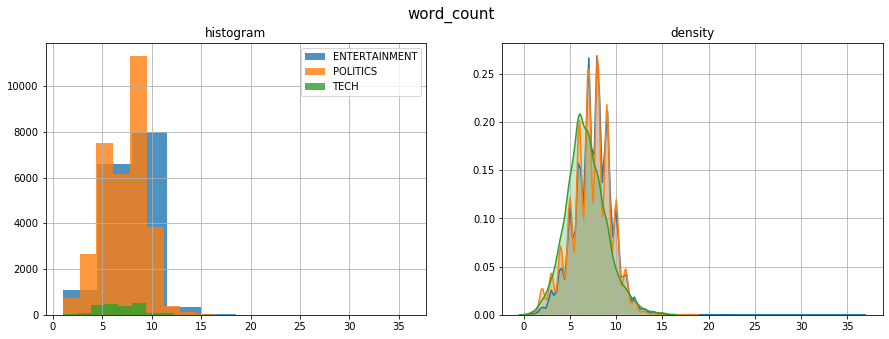

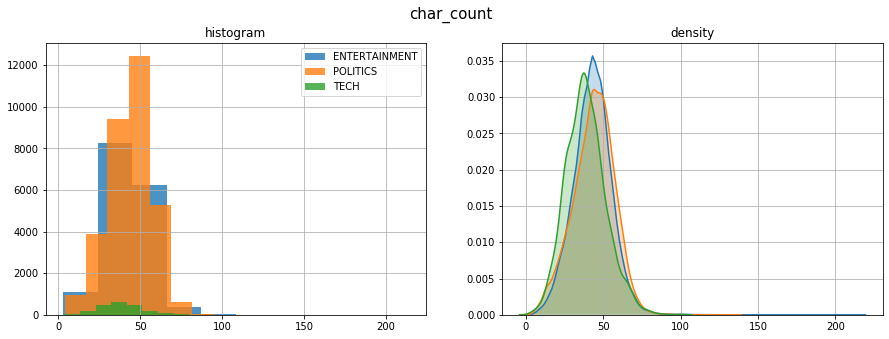

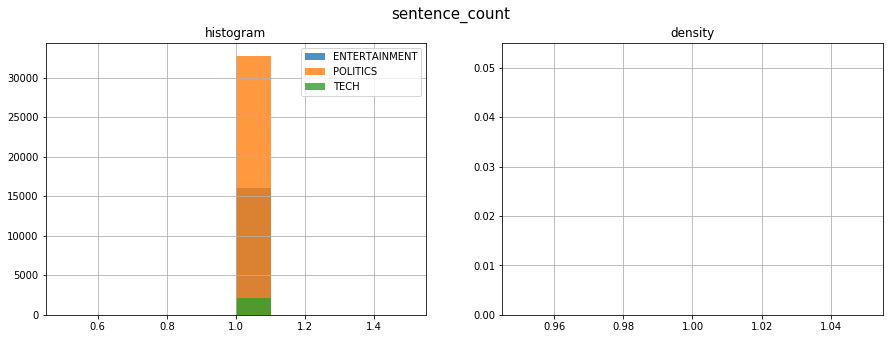

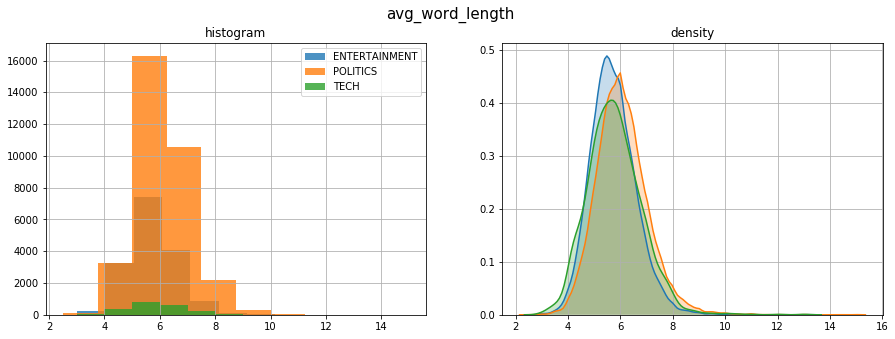

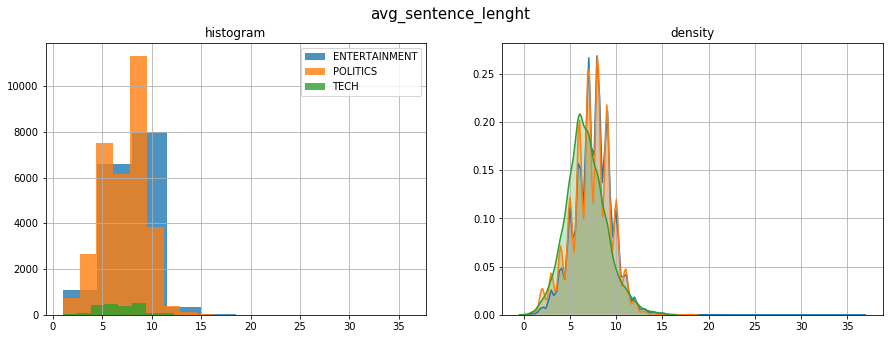

In [41]:
for col in ["word_count","char_count","sentence_count","avg_word_length","avg_sentence_lenght"]:
    utils_plot_distributions(dtf, x=col, y="y", bins=10, figsize=(15,5))

###### Sentiment Analysis

In [42]:
dtf = add_sentiment(dtf, "text_clean", algo="textblob", sentiment_range=(-1,1))
dtf.head()

             count      mean       std  min  25%  50%      75%  max
sentiment  50873.0  0.042462  0.257123 -1.0  0.0  0.0  0.09375  1.0


y                                               text  \
1  ENTERTAINMENT  Will Smith Joins Diplo And Nicky Jam For The 2...   
2  ENTERTAINMENT    Hugh Grant Marries For The First Time At Age 57   
3  ENTERTAINMENT  Jim Carrey Blasts 'Castrato' Adam Schiff And D...   
4  ENTERTAINMENT  Julianna Margulies Uses Donald Trump Poop Bags...   
5  ENTERTAINMENT  Morgan Freeman 'Devastated' That Sexual Harass...   

                                         text_tagged  \
1  Will_Smith Joins Diplo And Nicky_Jam For The_2...   
2    Hugh_Grant Marries For The First Time At Age 57   
3  Jim_Carrey Blasts 'Castrato'_Adam_Schiff And D...   
4  Julianna Margulies Uses Donald Trump Poop Bags...   
5  Morgan_Freeman_'Devastated' That Sexual Harass...   

                                                tags  tags_PERSON  \
1  [{('Will Smith', 'PERSON'): 1}, {('Nicky Jam',...            2   
2                    [{('Hugh Grant', 'PERSON'): 1}]            1   
3  [{('Jim Carrey', 'PERSON'): 1}, {('Castrato' A...            1   
4                                                 []            0   
5                 [{('Morgan Freeman '', 'ORG'): 1}]            0   

   tags_WORK_OF_ART  tags_PRODUCT  tags_NORP  tags_GPE  tags_FAC  tags_LOC  \
1                 0             0          0         0         0         0   
2                 0             0          0         0         0         0   
3                 1             0          1         1         0         0   
4                 0             0          0         0         0         0   
5                 0             0          0         0         0         0   

   tags_EVENT  tags_ORG                                         text_clean  \
1           2         0  smith join diplo nicky jam 2018 world cup offi...   
2           0         0               hugh grant marries first time age 57   
3           0         0  jim carrey blast castrato adam schiff democrat...   
4           0         0  julianna margulies us donald trump poop bag pi...   
5           0         1  morgan freeman devastated sexual harassment cl...   

   word_count  char_count  sentence_count  avg_word_length  \
1          10          46               1         4.600000   
2           7          30               1         4.285714   
3           9          50               1         5.555556   
4           9          44               1         4.888889   
5           9          64               1         7.111111   

   avg_sentence_lenght  sentiment  
1                 10.0   0.000000  
2                  7.0   0.250000  
3                  9.0   0.136364  
4                  9.0   0.000000  
5                  9.0   0.500000

In [43]:
# check
i = 0
print(dtf["text"].iloc[i], " --> ", dtf["sentiment"].iloc[i])

Will Smith Joins Diplo And Nicky Jam For The 2018 World Cup's Official Song  -->  0.0


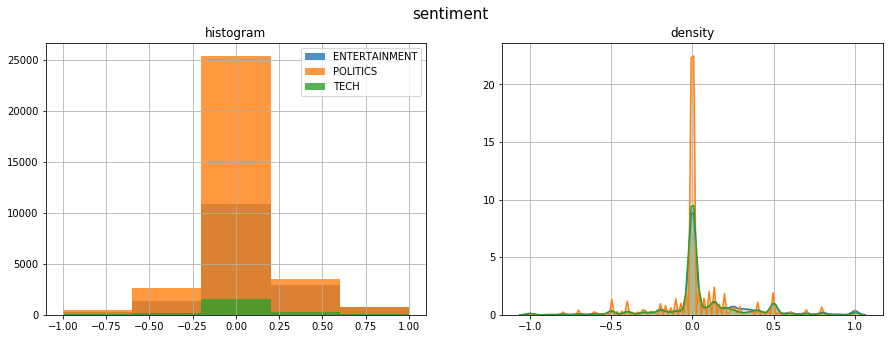

In [44]:
utils_plot_distributions(dtf, x="sentiment", y="y", bins=5, figsize=(15,5))

In [45]:
# I'll give a range of 0-1 to the sentiment
dtf = add_sentiment(dtf, "text_clean", algo="textblob", sentiment_range=(0,1))

             count      mean       std  min  25%  50%       75%  max
sentiment  50873.0  0.521231  0.128562  0.0  0.5  0.5  0.546875  1.0


###### Word frequency

# ENTERTAINMENT:


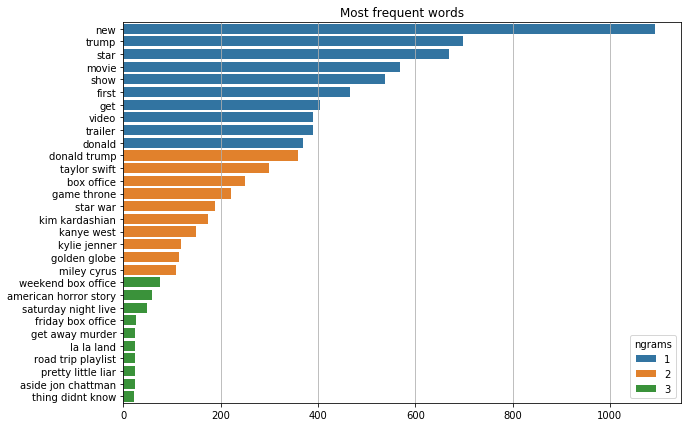

# POLITICS:


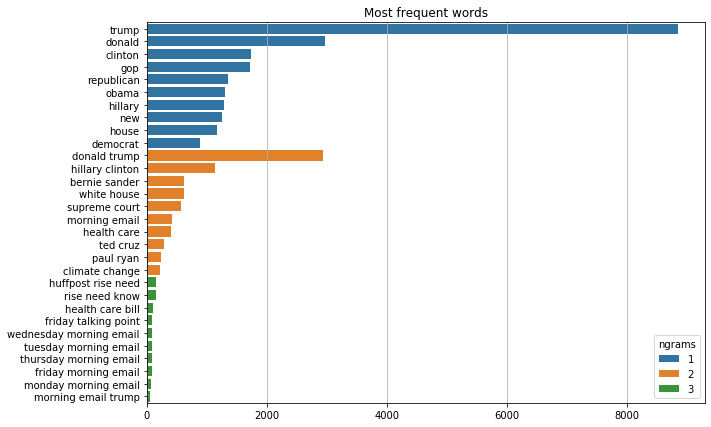

# TECH:


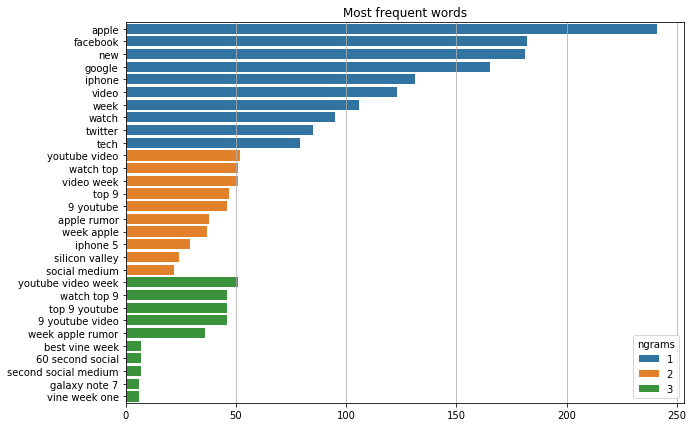

In [46]:
dtf_freq = pd.DataFrame()
for y in dtf["y"].unique():
    print("# {}:".format(y))
    dtf_y = word_freq(corpus=dtf[dtf["y"]==y]["text_clean"], ngrams=[1,2,3], top=10, figsize=(10,7))
    dtf_y["y"] = y
    dtf_freq = dtf_freq.append(dtf_y)

In [47]:
dtf_freq.sample(5)

word  freq  ngrams              y
45259         organic lovefest     1       2  ENTERTAINMENT
21460  harassment report jerry     1       3  ENTERTAINMENT
74885   federal worker climate     1       3       POLITICS
89985              actor movie     1       2  ENTERTAINMENT
7513             reprises role     2       2  ENTERTAINMENT

# ENTERTAINMENT:


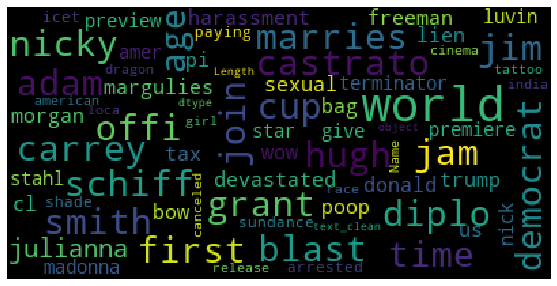

# POLITICS:


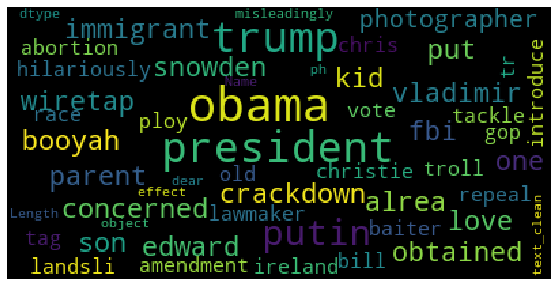

# TECH:


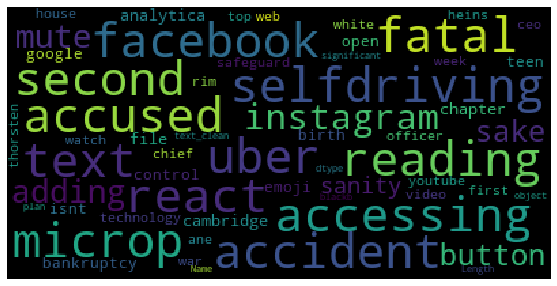

In [48]:
for y in dtf["y"].unique():
    print("# {}:".format(y))
    plot_wordcloud(corpus=dtf[dtf["y"]==y]["text_clean"], max_words=150, max_font_size=35, figsize=(10,5))

In [49]:
# add specific words as features
dtf = add_word_freq(dtf, "text_clean", lst_words=["new york","new","york"], freq="count")
dtf.head()

found records:
['new york: 301', 'new: 3201', 'york: 303']


y                                               text  \
1  ENTERTAINMENT  Will Smith Joins Diplo And Nicky Jam For The 2...   
2  ENTERTAINMENT    Hugh Grant Marries For The First Time At Age 57   
3  ENTERTAINMENT  Jim Carrey Blasts 'Castrato' Adam Schiff And D...   
4  ENTERTAINMENT  Julianna Margulies Uses Donald Trump Poop Bags...   
5  ENTERTAINMENT  Morgan Freeman 'Devastated' That Sexual Harass...   

                                         text_tagged  \
1  Will_Smith Joins Diplo And Nicky_Jam For The_2...   
2    Hugh_Grant Marries For The First Time At Age 57   
3  Jim_Carrey Blasts 'Castrato'_Adam_Schiff And D...   
4  Julianna Margulies Uses Donald Trump Poop Bags...   
5  Morgan_Freeman_'Devastated' That Sexual Harass...   

                                                tags  tags_PERSON  \
1  [{('Will Smith', 'PERSON'): 1}, {('Nicky Jam',...            2   
2                    [{('Hugh Grant', 'PERSON'): 1}]            1   
3  [{('Jim Carrey', 'PERSON'): 1}, {('Castrato' A...            1   
4                                                 []            0   
5                 [{('Morgan Freeman '', 'ORG'): 1}]            0   

   tags_WORK_OF_ART  tags_PRODUCT  tags_NORP  tags_GPE  tags_FAC  ...  \
1                 0             0          0         0         0  ...   
2                 0             0          0         0         0  ...   
3                 1             0          1         1         0  ...   
4                 0             0          0         0         0  ...   
5                 0             0          0         0         0  ...   

                                          text_clean  word_count  char_count  \
1  smith join diplo nicky jam 2018 world cup offi...          10          46   
2               hugh grant marries first time age 57           7          30   
3  jim carrey blast castrato adam schiff democrat...           9          50   
4  julianna margulies us donald trump poop bag pi...           9          44   
5  morgan freeman devastated sexual harassment cl...           9          64   

  sentence_count  avg_word_length  avg_sentence_lenght  sentiment  new york  \
1              1         4.600000                 10.0   0.500000       0.0   
2              1         4.285714                  7.0   0.625000       0.0   
3              1         5.555556                  9.0   0.568182       0.0   
4              1         4.888889                  9.0   0.500000       0.0   
5              1         7.111111                  9.0   0.750000       0.0   

   new  york  
1  0.0   0.0  
2  1.0   0.0  
3  0.0   0.0  
4  0.0   0.0  
5  1.0   0.0  

[5 rows x 23 columns]

###### Summary

In [50]:
# keeping all the features
dtf.head()

y                                               text  \
1  ENTERTAINMENT  Will Smith Joins Diplo And Nicky Jam For The 2...   
2  ENTERTAINMENT    Hugh Grant Marries For The First Time At Age 57   
3  ENTERTAINMENT  Jim Carrey Blasts 'Castrato' Adam Schiff And D...   
4  ENTERTAINMENT  Julianna Margulies Uses Donald Trump Poop Bags...   
5  ENTERTAINMENT  Morgan Freeman 'Devastated' That Sexual Harass...   

                                         text_tagged  \
1  Will_Smith Joins Diplo And Nicky_Jam For The_2...   
2    Hugh_Grant Marries For The First Time At Age 57   
3  Jim_Carrey Blasts 'Castrato'_Adam_Schiff And D...   
4  Julianna Margulies Uses Donald Trump Poop Bags...   
5  Morgan_Freeman_'Devastated' That Sexual Harass...   

                                                tags  tags_PERSON  \
1  [{('Will Smith', 'PERSON'): 1}, {('Nicky Jam',...            2   
2                    [{('Hugh Grant', 'PERSON'): 1}]            1   
3  [{('Jim Carrey', 'PERSON'): 1}, {('Castrato' A...            1   
4                                                 []            0   
5                 [{('Morgan Freeman '', 'ORG'): 1}]            0   

   tags_WORK_OF_ART  tags_PRODUCT  tags_NORP  tags_GPE  tags_FAC  ...  \
1                 0             0          0         0         0  ...   
2                 0             0          0         0         0  ...   
3                 1             0          1         1         0  ...   
4                 0             0          0         0         0  ...   
5                 0             0          0         0         0  ...   

                                          text_clean  word_count  char_count  \
1  smith join diplo nicky jam 2018 world cup offi...          10          46   
2               hugh grant marries first time age 57           7          30   
3  jim carrey blast castrato adam schiff democrat...           9          50   
4  julianna margulies us donald trump poop bag pi...           9          44   
5  morgan freeman devastated sexual harassment cl...           9          64   

  sentence_count  avg_word_length  avg_sentence_lenght  sentiment  new york  \
1              1         4.600000                 10.0   0.500000       0.0   
2              1         4.285714                  7.0   0.625000       0.0   
3              1         5.555556                  9.0   0.568182       0.0   
4              1         4.888889                  9.0   0.500000       0.0   
5              1         7.111111                  9.0   0.750000       0.0   

   new  york  
1  0.0   0.0  
2  1.0   0.0  
3  0.0   0.0  
4  0.0   0.0  
5  1.0   0.0  

[5 rows x 23 columns]

### 2 - Preprocessing

###### Encode Target

In [51]:
# not necessary
dtf, dic_y_mapping = add_encode_variable(dtf, "y")

print(dic_y_mapping)
dtf[["y","y_id"]].sample(5)

{0: 'ENTERTAINMENT', 1: 'POLITICS', 2: 'TECH'}


y  y_id
78657  ENTERTAINMENT     0
41995       POLITICS     1
83314       POLITICS     1
15704       POLITICS     1
19775       POLITICS     1

###### Partitioning

In [52]:
dtf_train, dtf_test = dtf_partitioning(dtf, y="y", test_size=0.3, shuffle=False)

X_train shape: (35611, 23) | X_test shape: (15262, 23)
y:
  POLITICS  -->  train: 0.71 | test: 0.49
  ENTERTAINMENT  -->  train: 0.26 | test: 0.44
  TECH  -->  train: 0.03 | test: 0.07
24 features: ['text', 'text_tagged', 'tags', 'tags_PERSON', 'tags_WORK_OF_ART', 'tags_PRODUCT', 'tags_NORP', 'tags_GPE', 'tags_FAC', 'tags_LOC', 'tags_EVENT', 'tags_ORG', 'text_clean', 'word_count', 'char_count', 'sentence_count', 'avg_word_length', 'avg_sentence_lenght', 'sentiment', 'new york', 'new', 'york', 'y_id']


In [53]:
y_train = dtf_train["y"].values
y_test = dtf_test["y"].values

### 3 - Baseline (Bag-of-Words + Machine Learning)

###### Plan:
- Features Engineering with vectorizer
- Features Selection by p-value
- Model Design
- Train / Test
- Evaluate
- Explainability

###### Features Engineering

In [54]:
# Count (classic BoW)
#vectorizer = feature_extraction.text.CountVectorizer(max_features=10000, ngram_range=(1,2), lowercase=False)

# Tf-Idf (advanced variant of BoW)
vectorizer = feature_extraction.text.TfidfVectorizer(max_features=10000, ngram_range=(1,2), lowercase=False)

--- creating sparse matrix ---
shape: (35611, 10000)
--- creating vocabulary ---
10000 words
--- tokenization ---
35611 texts


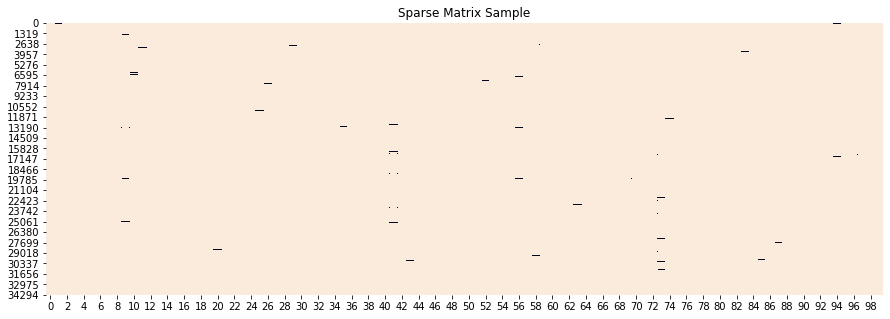

In [55]:
dic_bow = fit_bow(corpus=dtf_train["text_clean"], vectorizer=vectorizer, vocabulary=None)

X_train, X_names, vectorizer, dic_vocabulary, lst_text2tokens = dic_bow["X"], dic_bow["X_names"], dic_bow["vectorizer"], dic_bow["dic_vocabulary"], dic_bow["lst_text2tokens"]

In [56]:
# check some features
f_range = (500, 505)

print("fetures name (from dic_vocabulary):")
print({k:v for k,v in sorted(dic_vocabulary.items(), key=lambda item:item[1], reverse=False)
      if v in np.arange(f_range[0], f_range[1]+1, step=1)})

print("")
print("value of these features (in the sparse matrix) for the first text:")
print(vectorizer.get_feature_names()[f_range[0]:f_range[1]])
print(X_train[0, f_range[0]:f_range[1]].todense())

fetures name (from dic_vocabulary):
{'antitrump': 500, 'antitrump protest': 501, 'antitrump protester': 502, 'antitrump republican': 503, 'anton': 504, 'antonin': 505}

value of these features (in the sparse matrix) for the first text:
['antitrump', 'antitrump protest', 'antitrump protester', 'antitrump republican', 'anton']
[[0. 0. 0. 0. 0.]]


In [57]:
# check text conversion
i = 0

## list of text: ["I like this", ...]
len_txt = len(dtf_train["text_clean"].iloc[i].split())
print("from: ", dtf_train["text_clean"].iloc[i], "| len:", len_txt)

## list of token ids: [[1, 2, 3], ...]
len_tokens = len(lst_text2tokens[i])
print("to: ", lst_text2tokens[i], "| len:", len(lst_text2tokens[i]))

## vocabulary: {"I":1, "like":2, "this":3, ...}
print("check: ", dtf_train["text_clean"].iloc[i].split()[0], " -- idx in vocabulary -->", 
      dic_vocabulary[dtf_train["text_clean"].iloc[i].split()[0]])

## words not in vocabulary?
if len_txt-len_tokens != 0:
    missing_words = [word for word in dtf_train["text_clean"].iloc[i].split() if word not in dic_vocabulary.keys()]
    print("!!!", len_txt-len_tokens, "words not in vocabulary:", missing_words)

from:  smith join diplo nicky jam 2018 world cup official song | len: 10
to:  [8070, 4636, 4512, 62, 9881, 2098, 6132, 8120] | len: 8
check:  smith  -- idx in vocabulary --> 8070
!!! 2 words not in vocabulary: ['diplo', 'nicky']


###### Features Selection

In [58]:
X_names, dtf_selection = features_selection(X_train, dtf_train["y"], X_names, top=None, print_top=10)

features selection: from 10,000 to 3,235
 
# ENTERTAINMENT:
  . selected features: 2783
  . top features: actor, album, amy, award, baby, bachelor, beyoncé, box office, celebrity, chrissy
 
# POLITICS:
  . selected features: 2837
  . top features: actor, apple, award, celebrity, chrissy, chrissy teigen, clinton, dead, democrat, donald
 
# TECH:
  . selected features: 395
  . top features: amazon, android, app, apple, apple fbi, apps, artificial, artificial intelligence, battery, bitcoin
 


In [59]:
dtf_selection.sample(5)

feature     score              y
2263           defend  0.964147       POLITICS
1364  captain america  0.998396       POLITICS
4599        jj abrams  0.999841  ENTERTAINMENT
2182           dating  1.000000       POLITICS
7884      share first  0.996909       POLITICS

--- creating sparse matrix ---
shape: (35611, 3235)
--- used vocabulary ---
3235 words
--- tokenization ---
35611 texts


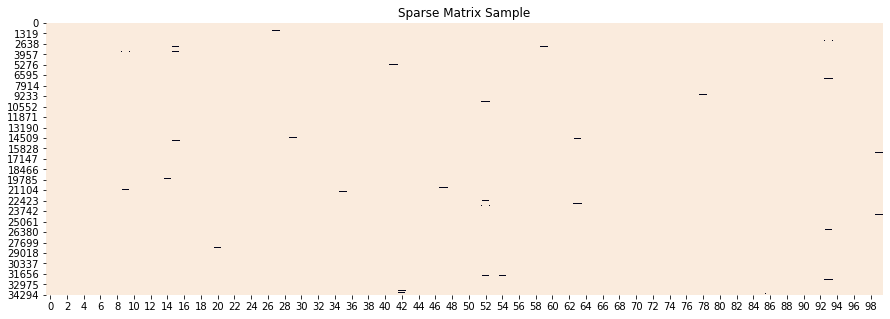

In [60]:
# Recreate Vectorizer with the selected vocabulary
dic_bow = fit_bow(corpus=dtf_train["text_clean"], vocabulary=X_names)

X_train, X_names, vectorizer, dic_vocabulary, lst_text2tokens = dic_bow["X"], dic_bow["X_names"], dic_bow["vectorizer"], dic_bow["dic_vocabulary"], dic_bow["lst_text2tokens"]

In [61]:
# Explore the sparse matrix as dtf
dtf_X_train = sparse2dtf(X_train, dic_vocabulary, X_names, prefix="")

In [62]:
dtf_X_train = pd.concat([dtf_train[["text","y"]], dtf_X_train.set_index(dtf_train.index)], axis=1)
dtf_X_train.head()

text              y  actor  \
1  Will Smith Joins Diplo And Nicky Jam For The 2...  ENTERTAINMENT    0.0   
2    Hugh Grant Marries For The First Time At Age 57  ENTERTAINMENT    0.0   
3  Jim Carrey Blasts 'Castrato' Adam Schiff And D...  ENTERTAINMENT    0.0   
4  Julianna Margulies Uses Donald Trump Poop Bags...  ENTERTAINMENT    0.0   
5  Morgan Freeman 'Devastated' That Sexual Harass...  ENTERTAINMENT    0.0   

   album  amy  award  baby  bachelor  beyoncé  box office  ...  hitting  \
1    0.0  0.0    0.0   0.0       0.0      0.0         0.0  ...      0.0   
2    0.0  0.0    0.0   0.0       0.0      0.0         0.0  ...      0.0   
3    0.0  0.0    0.0   0.0       0.0      0.0         0.0  ...      0.0   
4    0.0  0.0    0.0   0.0       0.0      0.0         0.0  ...      0.0   
5    0.0  0.0    0.0   0.0       0.0      0.0         0.0  ...      0.0   

   working  learning  escalates  without  sky  protestors  gender  cambridge  \
1      0.0       0.0        0.0      0.0  0.0         0.0     0.0        0.0   
2      0.0       0.0        0.0      0.0  0.0         0.0     0.0        0.0   
3      0.0       0.0        0.0      0.0  0.0         0.0     0.0        0.0   
4      0.0       0.0        0.0      0.0  0.0         0.0     0.0        0.0   
5      0.0       0.0        0.0      0.0  0.0         0.0     0.0        0.0   

   cambridge analytica  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0  
5                  0.0  

[5 rows x 3237 columns]

###### Model Design

In [63]:
classifier = naive_bayes.MultinomialNB()

###### Train / Test

In [64]:
# Take the raw text for X_test and will be transformed/predicted by the pipeline
X_test = dtf_test["text_clean"].values

In [65]:
model, predicted_prob, predicted = fit_ml_classif(X_train, y_train, X_test, vectorizer, classifier)

###### Evaluate

Accuracy: 0.85
Auc: 0.94
Detail:
               precision    recall  f1-score   support

ENTERTAINMENT       0.92      0.82      0.87      6723
     POLITICS       0.80      0.97      0.87      7446
         TECH       0.96      0.18      0.30      1093

     accuracy                           0.85     15262
    macro avg       0.89      0.66      0.68     15262
 weighted avg       0.86      0.85      0.83     15262



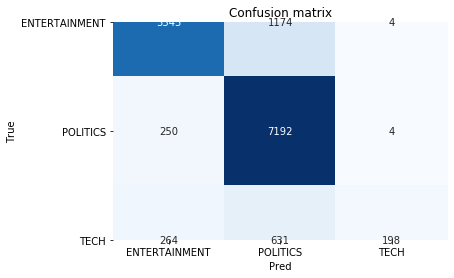

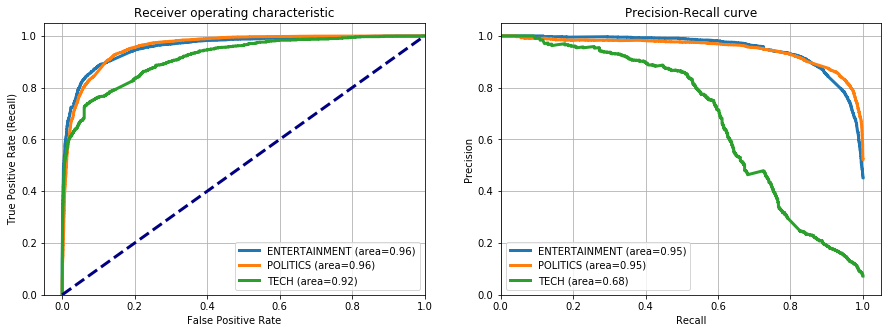

In [66]:
evaluate_multi_classif(y_test, predicted, predicted_prob, figsize=(15,5))

###### Explainability

In [67]:
i = 9
print("True:", y_test[i], "--> Pred:", predicted[i], "| Prob:", round(np.max(predicted_prob[i]),2))
print(" ")
exp = explainer_lime(model, y_train, txt_instance=dtf_test["text"].iloc[i], top=3)

True: POLITICS --> Pred: POLITICS | Prob: 0.99
 


### 4 - Model Desing & Testing (Embedding + Deep Learning)

###### Plan:
- Create common n-grams detectors
- Features Engineering with sequence padding
- Load/Train NLP
- Create Weights with word embedding
- Model Design
- Train / Test
- Evaluate
- Explainability

###### Common n-grams detectors

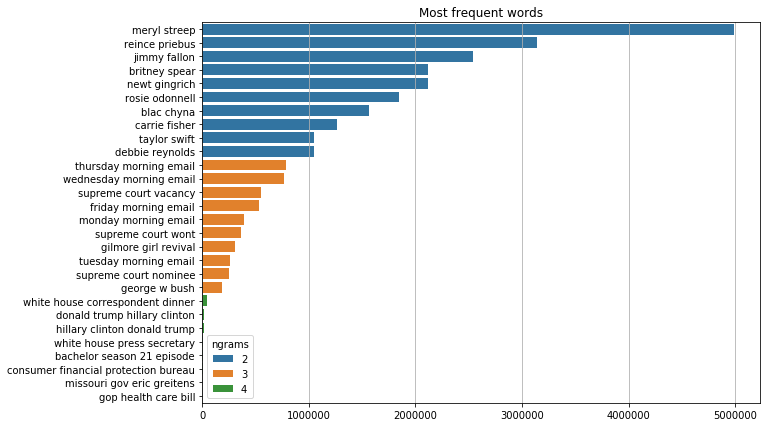

In [68]:
# not necessary, but useufl
lst_common_terms = ["of","with","without","and","or","the","a"]

lst_ngrams_detectors, dtf_ngrams = create_ngrams_detectors(corpus=dtf_train["text_clean"], 
                                                           lst_common_terms=lst_common_terms, min_count=5, 
                                                           top=10, figsize=(10,7))

In [69]:
txt = "donald trump is on saturday night live from new york"
lst_ngrams_detectors[1][txt.split()]

['donald trump', 'is', 'on', 'saturday night', 'live', 'from', 'new', 'york']

In [70]:
dtf_ngrams.sample(5)

word          freq  ngrams
266         michael bloomberg    831.220721       2
1858       donald trump rally   1054.462857       3
211              senate panel     36.210950       2
88    congressional candidate    224.301356       2
1551   bachelorette season 13  20503.444444       3

###### Features Engineering

--- tokenization ---
22783 words
--- padding to sequence ---
35611 sequences of length 15


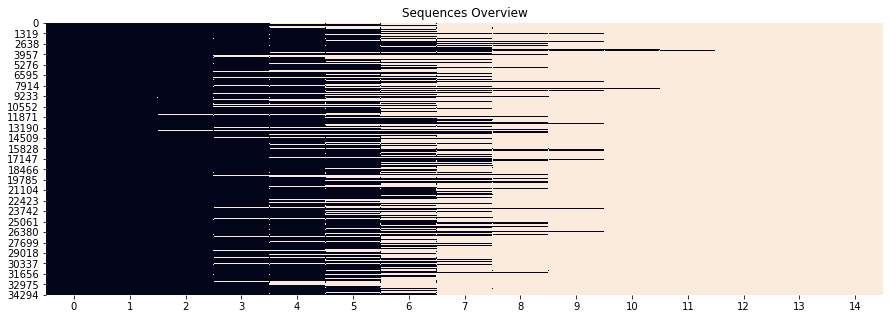

In [71]:
# create input for lstm (sequences of tokens)
dic_seq = text2seq(corpus=dtf_train["text_clean"], lst_ngrams_detectors=lst_ngrams_detectors, 
                   top=None, oov="NaN", maxlen=15)

X_train, tokenizer, dic_vocabulary = dic_seq["X"], dic_seq["tokenizer"], dic_seq["dic_vocabulary"]

In [72]:
# check text conversion
i = 0

## list of text: ["I like this", ...]
len_txt = len(dtf_train["text_clean"].iloc[i].split())
print("from: ", dtf_train["text_clean"].iloc[i], "| len:", len_txt)

## sequence of token ids: [[1, 2, 3], ...]
len_tokens = len(X_train[i])
print("to: ", X_train[i], "| len:", len(X_train[i]))

## vocabulary: {"I":1, "like":2, "this":3, ...}
print("check: ", dtf_train["text_clean"].iloc[i].split()[0], " -- idx in vocabulary -->", 
      dic_vocabulary[dtf_train["text_clean"].iloc[i].split()[0]])

print("vocabulary: ", dict(list(dic_vocabulary.items())[0:5]), "... (padding element, 0)")

from:  smith join diplo nicky jam 2018 world cup official song | len: 10
to:  [ 670  310 8900 8901 4327  320   84 4767   70  435    0    0    0    0
    0] | len: 15
check:  smith  -- idx in vocabulary --> 670
vocabulary:  {'NaN': 1, 'trump': 2, 'donald trump': 3, 'new': 4, 'hillary clinton': 5} ... (padding element, 0)


--- tokenization ---
--- padding to sequence ---
15262 sequences of length 15


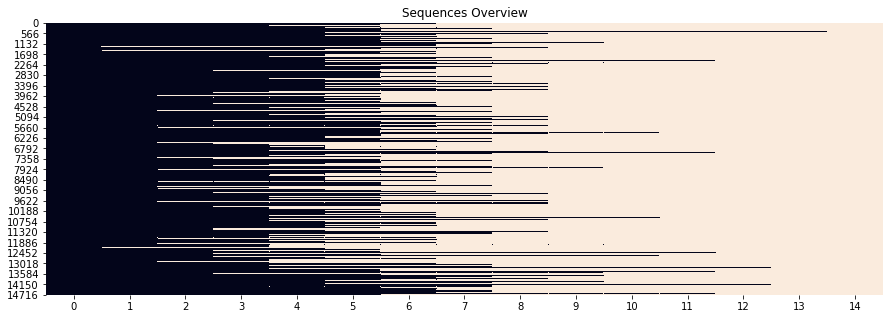

In [73]:
# Preprocess Test with the same tokenizer
X_test = text2seq(corpus=dtf_test["text_clean"], lst_ngrams_detectors=lst_ngrams_detectors,
                  fitted_tokenizer=tokenizer, maxlen=X_train.shape[1])

###### Load/Train NLP

In [74]:
# Load pre-trained NLP
#nlp = gensim_api.load("glove-wiki-gigaword-300")

In [75]:
# Or train Word2Vec from scratch
avg_len = np.max([len(text.split()) for text in dtf_train["text_clean"]]) /2 

lst_corpus, nlp = fit_w2v(corpus=dtf_train["text_clean"], lst_ngrams_detectors=lst_ngrams_detectors,
                          min_count=1, size=300, window=avg_len, sg=0, epochs=30)

In [76]:
# check nlp model
word = "avenger infinity war"
nlp[word].shape

(300,)

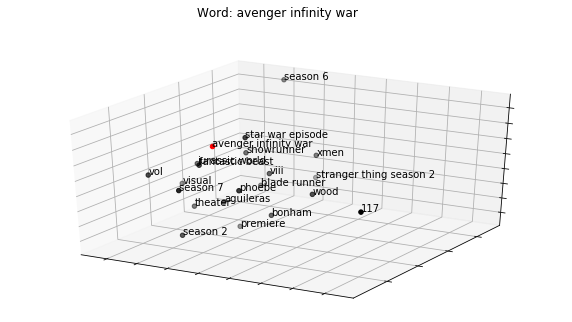

In [77]:
#%matplotlib notebook
plot_w2v([word], nlp, plot_type="3d", top=20, figsize=(10,5))

In [79]:
plot_w2v(nlp, plot_type="2d", annotate=False, figsize=(20,10))

TypeError: object of type 'Word2VecKeyedVectors' has no len()

<Figure size 1440x720 with 0 Axes>

###### Create Weights

In [186]:
embeddings = vocabulary_embeddings(dic_vocabulary, nlp)

vocabulary mapped to 22338 vectors of size 300


In [187]:
# check
word = dtf_train["text_clean"].iloc[0].split()[0]
print("word:", word)
print("dic[word]:", dic_vocabulary[word], "|idx")
print("embeddings[idx]:", embeddings[dic_vocabulary[word]].shape, "|vector")

word: smith
dic[word]: 611 |idx
embeddings[idx]: (300,) |vector


In [188]:
# padding element
print("null vector:", 0)
embeddings[0]

null vector: 0


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

###### Model Design

In [189]:
def attention_layer(inputs, neurons):
    x = layers.Permute((2,1))(inputs)
    x = layers.Dense(neurons, activation="softmax")(x)
    x = layers.Permute((2,1), name="attention")(x)
    x = layers.multiply([inputs, x])
    return x

In [190]:
# Embedding network with Bi-LSTM and Attention layers (for attention explainer)

x_in = layers.Input(shape=(X_train.shape[1],))
## embedding
x = layers.Embedding(input_dim=embeddings.shape[0], output_dim=embeddings.shape[1], weights=[embeddings],
                     input_length=X_train.shape[1], trainable=False)(x_in)
## attention
x = attention_layer(x, neurons=X_train.shape[1])
## 2 layers of bidirectional lstm
x = layers.Bidirectional(layers.LSTM(units=X_train.shape[1], dropout=0.2, return_sequences=True))(x)
x = layers.Bidirectional(layers.LSTM(units=X_train.shape[1], dropout=0.2))(x)
## final dense layers
x = layers.Dense(64, activation='relu')(x)
y_out = layers.Dense(len(np.unique(y_train)), activation='softmax')(x)
## compile
model = models.Model(x_in, y_out)
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 15)           0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 15, 300)      6701400     input_3[0][0]                    
__________________________________________________________________________________________________
permute_2 (Permute)             (None, 300, 15)      0           embedding_2[0][0]                
__________________________________________________________________________________________________
dense_6 (Dense)                 (None, 300, 15)      240         permute_2[0][0]                  
__________________________________________________________________________________________________
attention 

In [191]:
# Binary version without attention (shap explainer only works with this)

#y_train = pd.get_dummies(dtf_train["y"], drop_first=False).values

#model = models.Sequential([
#    layers.Embedding(input_dim=embeddings.shape[0], output_dim=embeddings.shape[1], weights=[embeddings],
#                     input_length=X_train.shape[1], trainable=False),
#    layers.LSTM(units=X_train.shape[1], dropout=0.2),
#    layers.Dense(3, activation='sigmoid')
#])
#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#model.summary()

#training = model.fit(x=X_train, y=y_train, batch_size=256, epochs=10, shuffle=True, verbose=0, validation_split=0.3)
#utils_plot_keras_training(training)
#predicted_prob = model.predict(X_test)
#predicted = [dic_y_mapping[np.argmax(pred)] for pred in predicted_prob]

###### Train / Test

{0: 'ENTERTAINMENT', 1: 'POLITICS', 2: 'TECH'}


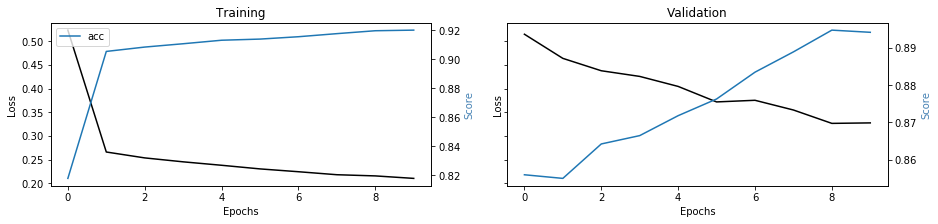

In [192]:
# this takes a while
model, predicted_prob, predicted = fit_dl_classif(X_train, y_train, X_test, encode_y=True, 
                                                  model=model, epochs=10, batch_size=256)

###### Evaluate

Accuracy: 0.84
Auc: 0.92
Detail:
               precision    recall  f1-score   support

ENTERTAINMENT       0.88      0.83      0.85      6439
     POLITICS       0.81      0.94      0.87      7179
         TECH       0.93      0.24      0.38      1067

     accuracy                           0.84     14685
    macro avg       0.87      0.67      0.70     14685
 weighted avg       0.85      0.84      0.83     14685



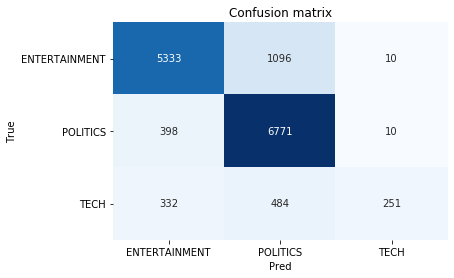

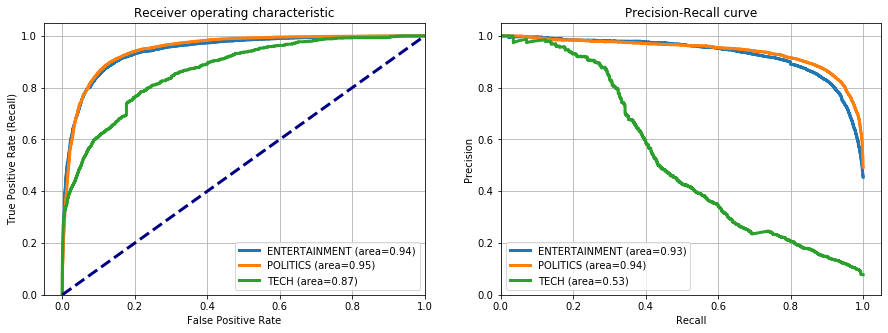

In [193]:
evaluate_multi_classif(y_test, predicted, predicted_prob, figsize=(15,5))

###### Explainability

True: POLITICS --> Pred: POLITICS | Prob: 1.0
 


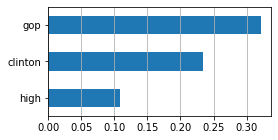

Text with highlighted words


In [319]:
i = 9
print("True:", y_test[i], "--> Pred:", predicted[i], "| Prob:", round(np.max(predicted_prob[i]),2))
print(" ")
text_exp = explainer_attention(model, tokenizer, dtf_test["text"].iloc[i], lst_ngrams_detectors, top=3, figsize=(4,2))

print("\033[1m"+"Text with highlighted words")
from IPython.core.display import display, HTML
display(HTML(text_exp))

### 5 - Model Desing & Testing (Language model + Transfer Learning)

###### Plan:
- Features Engineering
- Model Design
- Train / Test
- Evaluate
- Explainability

###### Features Engineering

In [24]:
# Load pre-trained BERT tokenizer
#tokenizer = transformers.BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)
#nlp = transformers.TFBertModel.from_pretrained('bert-base-uncased')
#lst_vocabulary = list(tokenizer.vocab.keys())

In [4]:
# Load pre-trained BERT tokenizer (use a lighter veriosn: distil-BERT)
tokenizer = transformers.AutoTokenizer.from_pretrained('distilbert-base-uncased', do_lower_case=True)
nlp = transformers.TFDistilBertModel.from_pretrained('distilbert-base-uncased')
lst_vocabulary = list(tokenizer.vocab.keys())

In [35]:
# check nlp model
txt = "river bank"
tensor = embedding_bert(txt, tokenizer, nlp)
print("tensor shape:", tensor.shape)
print("mean:", np.mean(tensor[0][1]))

tokens: ['river', 'bank']
ids   : [2314, 2924]
tensor shape: (1, 2, 768)
mean: -0.011292591


In [33]:
X_train = tokenize_bert(corpus=dtf_train["text"], tokenizer=tokenizer, maxlen=50)

maxlen: 50
created tensor idx-masks-segments: 3x (35615, 50)


In [34]:
# check feature creation
i = 0

print("txt: ", dtf_train["text"].iloc[0])
print("tokenized:", [tokenizer.convert_ids_to_tokens(idx) for idx in X_train[0][i].tolist()])
print("idx: ", X_train[0][i])
print("mask: ", X_train[1][i])
print("segment: ", X_train[2][i])

txt:  Will Smith Joins Diplo And Nicky Jam For The 2018 World Cup's Official Song
tokenized: ['[CLS]', 'will', 'smith', 'joins', 'dip', '##lo', 'and', 'nicky', 'jam', 'for', 'the', '2018', 'world', 'cups', 'official', 'song', '[SEP]', '[UNK]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]']
idx:  [  101  2097  3044  9794 16510  4135  1998 20158  9389  2005  1996  2760
  2088 10268  2880  2299   102   100     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0]
mask:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]
segment:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1

In [85]:
X_test = tokenize_bert(corpus=dtf_test["text"], tokenizer=tokenizer, maxlen=50)

maxlen: 50
created tensor idx-masks-segments: 3x (14687, 50)


###### Model Design

In [79]:
# Pre-trained BERT + fine-tuning (transfer learning)

## inputs
#idx = layers.Input((50), dtype="int32", name="input_idx")
#masks = layers.Input((50), dtype="int32", name="input_masks")
#segments = layers.Input((50), dtype="int32", name="input_segments")
## pre-trained bert
#bert = transformers.TFBertModel.from_pretrained("bert-base-uncased")
#bert_out, _ = bert([idx, masks, segments])
## fine-tuning
#x = layers.GlobalAveragePooling1D()(bert_out)
#x = layers.Dense(64, activation="relu")(x)
#y_out = layers.Dense(len(np.unique(y_train)), activation='softmax')(x)
## compile
#model = models.Model([idx, masks, segments], y_out)
#for layer in model.layers[:4]:
#    layer.trainable = False
#model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#model.summary()

Model: "model_12"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_idx (InputLayer)          [(None, 50)]         0                                            
__________________________________________________________________________________________________
input_masks (InputLayer)        [(None, 50)]         0                                            
__________________________________________________________________________________________________
input_segments (InputLayer)     [(None, 50)]         0                                            
__________________________________________________________________________________________________
tf_bert_model_5 (TFBertModel)   ((None, 50, 768), (N 109482240   input_idx[0][0]                  
                                                                 input_masks[0][0]         

In [86]:
# Pre-trained distil-BERT + fine-tuning (transfer learning)

## inputs
idx = layers.Input((50), dtype="int32", name="input_idx")
masks = layers.Input((50), dtype="int32", name="input_masks")
## pre-trained bert with config
config = transformers.DistilBertConfig(dropout=0.2, attention_dropout=0.2)
config.output_hidden_states = False
nlp = transformers.TFDistilBertModel.from_pretrained('distilbert-base-uncased', config=config)
bert_out = nlp(idx, attention_mask=masks)[0]
## fine-tuning
x = layers.GlobalAveragePooling1D()(bert_out)
x = layers.Dense(64, activation="relu")(x)
y_out = layers.Dense(len(np.unique(y_train)), activation='softmax')(x)
## compile
model = models.Model([idx, masks], y_out)
for layer in model.layers[:3]:
    layer.trainable = False
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "model_13"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_idx (InputLayer)          [(None, 50)]         0                                            
__________________________________________________________________________________________________
input_masks (InputLayer)        [(None, 50)]         0                                            
__________________________________________________________________________________________________
tf_distil_bert_model_12 (TFDist ((None, 50, 768),)   66362880    input_idx[0][0]                  
__________________________________________________________________________________________________
global_average_pooling1d_13 (Gl (None, 768)          0           tf_distil_bert_model_12[0][0]    
___________________________________________________________________________________________

###### Train / Test

In [87]:
# this takes a while
model, predicted_prob, predicted = fit_bert_classif(X_train, y_train, X_test, encode_y=True, 
                                                    model=model, epochs=1, batch_size=64)

{0: 'ENTERTAINMENT', 1: 'POLITICS', 2: 'TECH'}
Train on 23986 samples, validate on 10281 samples
23986/23986 [==============================] - 3976s 166ms/sample - loss: 0.2501 - accuracy: 0.9051 - val_loss: 0.2951 - val_accuracy: 0.8983


###### Evaluate

Accuracy: 0.86
Auc: 0.96
Detail:
               precision    recall  f1-score   support

ENTERTAINMENT       0.91      0.86      0.88      6433
     POLITICS       0.83      0.96      0.89      7185
         TECH       0.95      0.28      0.43      1069

     accuracy                           0.86     14687
    macro avg       0.90      0.70      0.73     14687
 weighted avg       0.87      0.86      0.85     14687



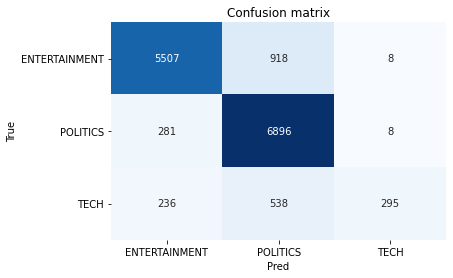

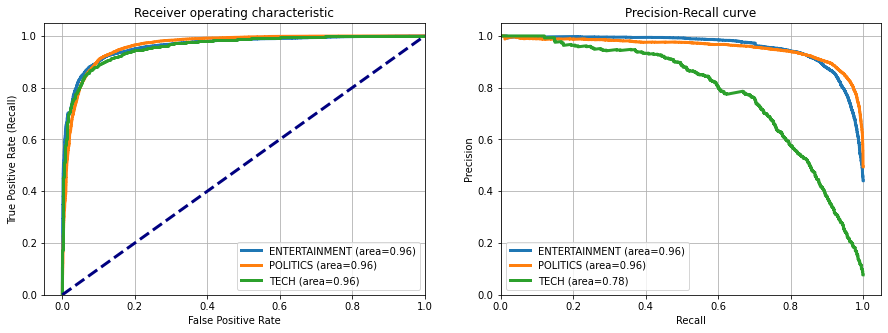

In [88]:
evaluate_multi_classif(y_test, predicted, predicted_prob, figsize=(15,5))

###### Explainability

### 6 - Model Desing & Testing (Clustering by Similarity)

###### Plan:
- Create clusters by defining keywords for each class
- Train a PCA (not necessary)
- Create observation vector with NLP, if given remove PCA, calculate distance from clusters
- Evaluate
- Explainability

######  Create Clusters

In [630]:
# Strategy 1) From the feature selection in BoW ...
dtf_selection.sample(3)

feature     score              y
5556   might  0.999921           TECH
2375    dems  0.994426       POLITICS
7113  repeal  0.999995  ENTERTAINMENT

In [693]:
dic_clusters = {}
for y in np.unique(y_train):
    dic_clusters[y] = [word for word in dtf_selection[dtf_selection["y"]==y]["feature"].tolist() if nlp.vocab.get(word)]

for k,v in dic_clusters.items():
    print(k, ": ", v[0:5], "...", len(v))

ENTERTAINMENT :  ['actor', 'album', 'amy', 'award', 'bachelor'] ... 2251
POLITICS :  ['actor', 'apple', 'award', 'celebrity', 'clinton'] ... 2299
TECH :  ['amazon', 'android', 'app', 'apple', 'apps'] ... 344


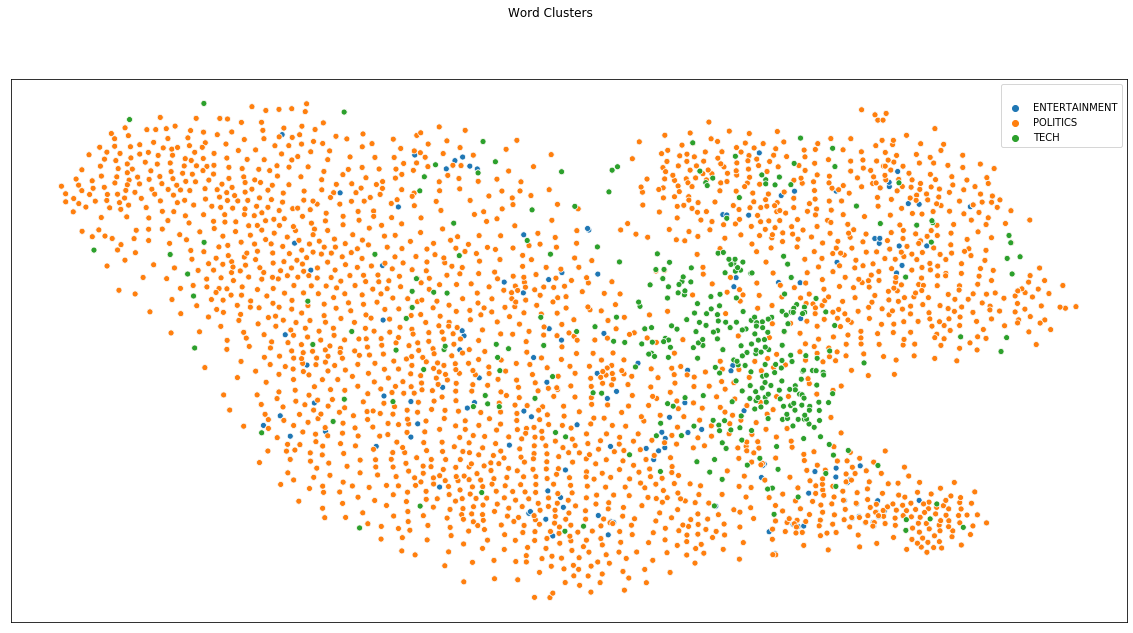

In [694]:
plot_w2v_cluster(dic_clusters, nlp, plot_type="2d", annotate=False, figsize=(20,10))

In [695]:
#-> It's no good, they are not specific, POLITICS is pretty much everywhere.

# ENTERTAINMENT:
--- training ---


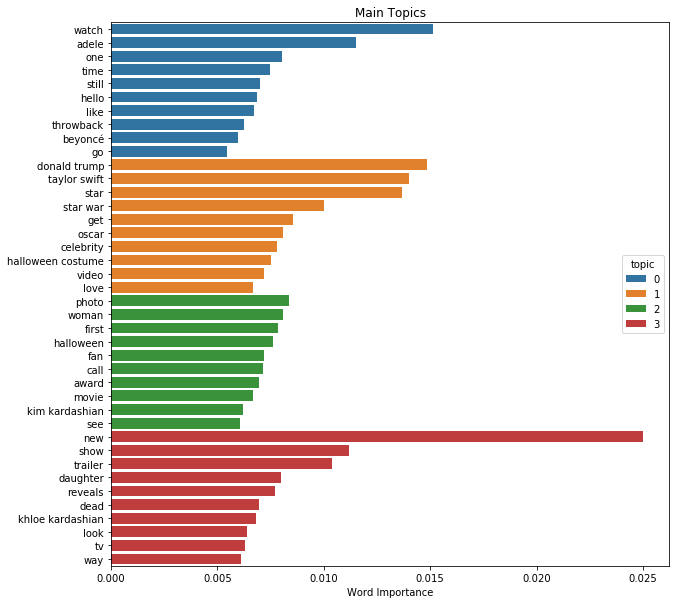

 
# POLITICS:
--- training ---


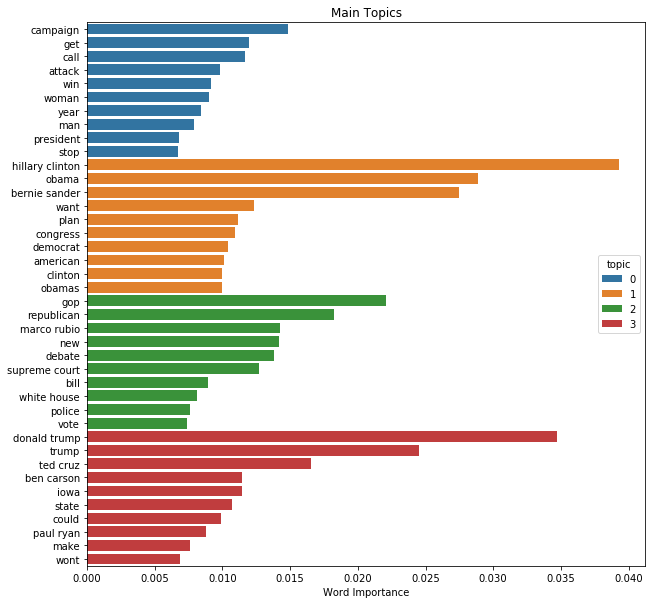

 
# TECH:
--- training ---


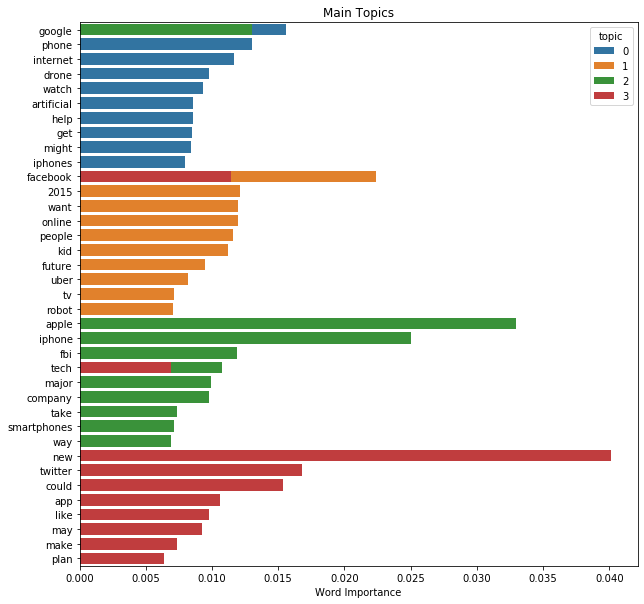

In [696]:
# Strategy 2) LDA for topic modeling
dtf_topics = pd.DataFrame()
for y in dtf_train["y"].unique():
    print("# {}:".format(y))
    lda, dtf_y = fit_lda(corpus=dtf_train[dtf_train["y"]==y]["text_clean"], n_topics=4, 
                         lst_ngrams_detectors=lst_ngrams_detectors, figsize=(10,10))
    dtf_y["y"] = y
    dtf_topics = dtf_topics.append(dtf_y)
    print(" ")

In [697]:
dtf_topics.sample(5)

topic    id        word    weight              y
5       0  1946  artificial  0.008581           TECH
32      3   495     trailer  0.010391  ENTERTAINMENT
19      1   472        love  0.006674  ENTERTAINMENT
16      1   382      future  0.009449           TECH
9       0   405        stop  0.006703       POLITICS

In [702]:
dic_clusters = {y:dtf_topics[dtf_topics["y"]==y]["word"].values.tolist() for y in dtf_topics["y"].unique()}

for k,v in dic_clusters.items():
    print(k, ": ", v[0:5], "...", len(v))

ENTERTAINMENT :  ['watch', 'adele', 'one', 'time', 'still'] ... 40
POLITICS :  ['campaign', 'get', 'call', 'attack', 'win'] ... 40
TECH :  ['google', 'phone', 'internet', 'drone', 'watch'] ... 40


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


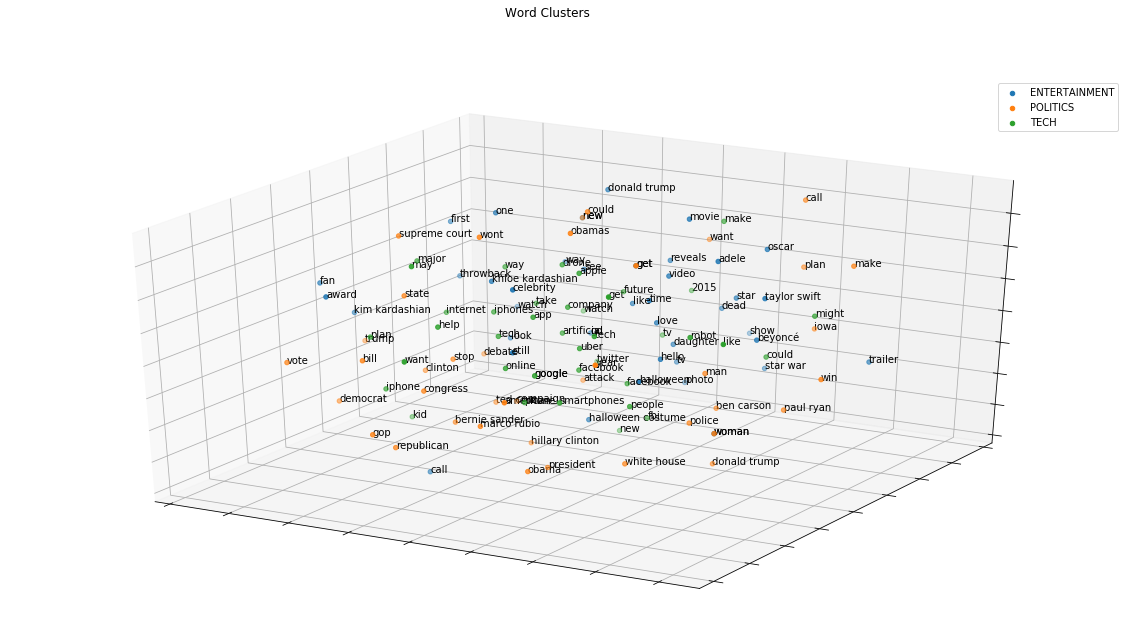

In [704]:
#%matplotlib notebook
plot_w2v_cluster(dic_clusters, nlp, plot_type="3d", annotate=True, figsize=(20,10))

In [ ]:
#-> Still not good.

In [682]:
# Strategy 3) using NLP to get smilar words from manual inputs
nlp.most_similar(["avenger infinity war","box office"], topn=3)

[('jungle', 0.9532409906387329),
 ('theater', 0.9492863416671753),
 ('viii', 0.9484392404556274)]

In [683]:
dic_clusters = {}
dic_clusters["ENTERTAINMENT"] = get_similar_words(['celebrity','box office','movie','music'], top=30, nlp=nlp)
dic_clusters["POLITICS"] = get_similar_words(['gop','clinton','white house','obama','republican'], top=30, nlp=nlp)
dic_clusters["TECH"] = get_similar_words(['amazon','android','app','apple','facebook','google','tech'], top=30, nlp=nlp)

for k,v in dic_clusters.items():
    print(k, ": ", v[0:5], "...", len(v))

ENTERTAINMENT :  ['clip', 'britney spear', 'queen', 'movie', 'mindhunter'] ... 34
POLITICS :  ['tom cotton', 'devin nunes', 'crude', 'senator', 'rand paul'] ... 35
TECH :  ['cheaper', 'apple', 'disable', 'bug', 'software'] ... 37


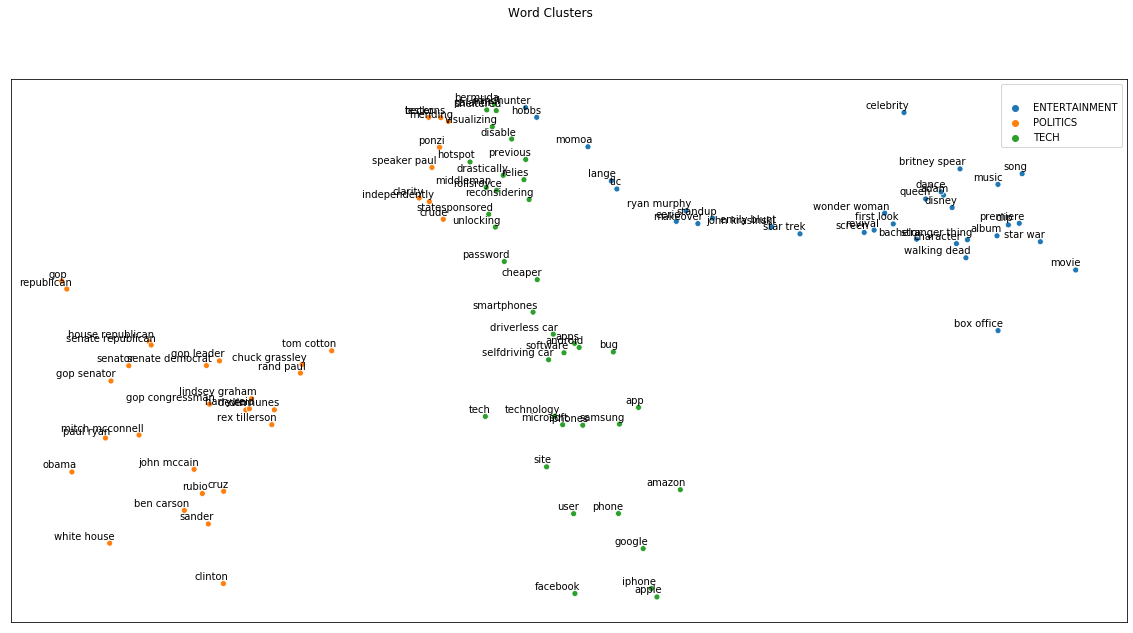

In [684]:
plot_w2v_cluster(dic_clusters, nlp, plot_type="2d", annotate=True, figsize=(20,10))

In [ ]:
#-> Much better, they are separated from each other.

###### Fit PCA

In [402]:
# Not necessary
#pca = fit_pca_w2v(corpus=dtf_train["text_clean"], nlp=nlp)

X shape: (34265, 300)
pca shape: (34265, 300)


###### Predict Clusters

In [465]:
predicted_prob, predicted = predict_similarity_w2v(corpus=dtf_test["text_clean"], dic_clusters=dic_clusters, 
                                                   nlp=nlp, pca=None)

--- embedding X and y ---
ENTERTAINMENT shape: (300,)
POLITICS shape: (300,)
TECH shape: (300,)
X shape: (14685, 300)
--- computing similarity ---


###### Evaluate

Accuracy: 0.64
Auc: 0.86
Detail:
               precision    recall  f1-score   support

ENTERTAINMENT       0.85      0.77      0.81      6439
     POLITICS       0.93      0.51      0.66      7179
         TECH       0.15      0.71      0.25      1067

     accuracy                           0.64     14685
    macro avg       0.64      0.66      0.57     14685
 weighted avg       0.84      0.64      0.69     14685



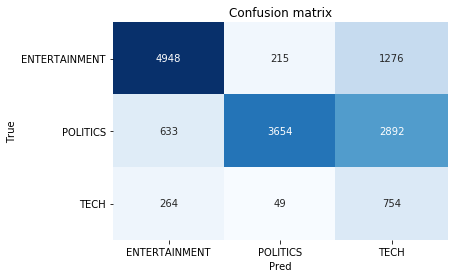

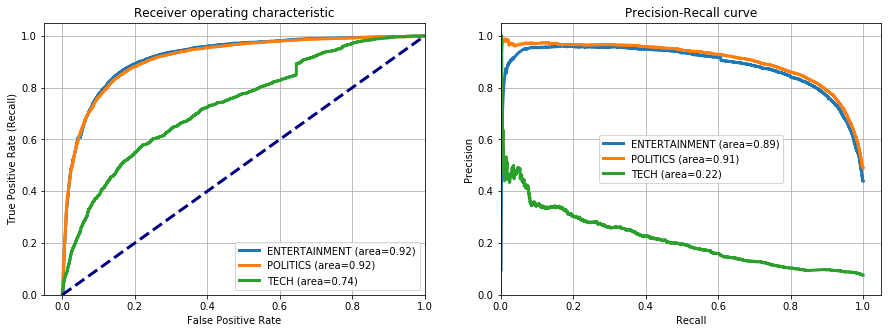

In [463]:
evaluate_multi_classif(y_test, predicted, predicted_prob, figsize=(15,5))

###### Explainability

## My Test

In [88]:
import spacy
#nlp = spacy.load('en_trf_bertbaseuncased_lg')

# doc = nlp("spaCy is awesome.")

# # No tags 
# print([(t.text, t.pos_) for t in doc])
# #('spaCy', ''), ('is', ''), ('awesome', ''), ('.', '')]

# Manual add
nlp_en = spacy.load('en_core_web_sm')
tagger_pipe = nlp_en.get_pipe("tagger")
nlp.add_pipe(tagger_pipe, after='sentencizer')

# Tags there
doc = nlp("spaCy is awesome.")
print([(t.text, t.pos_) for t in doc])
#[('spaCy', 'PROPN'), ('is', 'AUX'), ('awesome', 'ADJ'), ('.', 'PUNCT')]

ValueError: [E007] 'tagger' already exists in pipeline. Existing names: ['tagger', 'parser', 'ner']